## Pandas

`Pandas` es una biblioteca de Python ampliamente utilizada para análisis de datos y manipulación de datos tabulares. Proporciona estructuras de datos potentes y flexibles, como DataFrame y Series, que son fundamentales para trabajar con conjuntos de datos. 

> No es la única biblioteca de Python para manejar tablas de datos, pueden consultar otras como [Polars](https://pola.rs/), [DuckDB](https://duckdb.org/), etc. Pero se ha convertido en un módulo muy popular.

La instalamos como siempre
```bash
pip install pandas
```



In [1]:
import pandas as pd

Pandas tiene dos tipos fundamentales de estructuras de datos:

a. `DataFrame`: Una estructura de datos tabular bidimensional con etiquetas en filas y columnas.

b. `Series`: Un arreglo unidimensional etiquetado capaz de contener cualquier tipo de datos.

In [2]:
# Crear una Serie a partir de una lista
s = pd.Series([1, 2, 3, 4, 5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


Notar que el `print` ya muestra los datos en forma adecuada, indicando los índices (columna de la izquierda) y el tipo de dato de la serie.

In [3]:
s.index, s.values

(RangeIndex(start=0, stop=5, step=1), array([1, 2, 3, 4, 5]))

In [4]:
import numpy as np 

s_np = s.array # cast de la serie a un arreglo de numpy.
print(s_np)
np.sum(s_np)

<PandasArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64


15

In [5]:
# Crear un DataFrame a partir de un diccionario
data = {'Nombre': ['Juan', 'María', 'Pedro', 'Ana'],
        'Edad': [25, 30, 35, 40]}
df = pd.DataFrame(data)
print(df)

  Nombre  Edad
0   Juan    25
1  María    30
2  Pedro    35
3    Ana    40


Podemos agregar columnas como

In [6]:
df['Ocupacion'] = ['Estudiante', 'Ingeniera', 'Doctor', 'Profesora']
print(df)

  Nombre  Edad   Ocupacion
0   Juan    25  Estudiante
1  María    30   Ingeniera
2  Pedro    35      Doctor
3    Ana    40   Profesora


Y podemos agregar una nueva fila:

In [7]:
eva = pd.DataFrame({'Nombre': ['Eva'], 'Edad': [28], 'Ocupacion': ['Ingeniera']})
df = pd.concat([df,eva], ignore_index=True)
print(df)

  Nombre  Edad   Ocupacion
0   Juan    25  Estudiante
1  María    30   Ingeniera
2  Pedro    35      Doctor
3    Ana    40   Profesora
4    Eva    28   Ingeniera



------

**Nota:**

> En versiones anteriores de pandas a 2.0, existe una método `.append`. Sin embargo, ese método ya no está visible en la clase.

> Notar también que cada valor del diccionario es una lista. Si se  eligiera usar los correspondientes valores escalares, es necesario indicar el índice en el cual se quiere concatenar la fila:

------


In [8]:
lio = pd.DataFrame({'Nombre': 'Lionel', 'Edad': 37, 'Ocupacion': 'Futbolista'})
df = pd.concat([df,eva], ignore_index=True)
print(df)

ValueError: If using all scalar values, you must pass an index

Si en lugar de la lista, utilizamos un valor escalar tenemos que decirle en qué lugar (índice) queremos agregar el elemento

In [9]:
lio = pd.DataFrame({'Nombre': 'Lionel', 'Edad': 37, 'Ocupacion': 'Futbolista'}, index=[14])
df = pd.concat([df,lio])
print(df)

    Nombre  Edad   Ocupacion
0     Juan    25  Estudiante
1    María    30   Ingeniera
2    Pedro    35      Doctor
3      Ana    40   Profesora
4      Eva    28   Ingeniera
14  Lionel    37  Futbolista


Notemos que si usamos `ignore_index=True`, la fila se agrega al final del `DataFrame`, mientras que si no lo usamos (`ignore_index=False`), se mantiene el indice provisto por el dataframe particular (en este caso, `14`).

In [10]:
print(df.head(2))

  Nombre  Edad   Ocupacion
0   Juan    25  Estudiante
1  María    30   Ingeniera


Es fácil guardar los datos:

In [13]:
df.to_csv('../data/lista_gente.csv', index=False)

In [14]:
!cat ../data/lista_gente.csv

Nombre,Edad,Ocupacion
Juan,25,Estudiante
María,30,Ingeniera
Pedro,35,Doctor
Ana,40,Profesora
Eva,28,Ingeniera
Lionel,37,Futbolista


Del mismo modo, se puede leer un csv:

In [15]:
tasa_natalidad = pd.read_csv('../data/tasa-natalidad.csv')
# print(tasa_natalidad)
tasa_natalidad

,indice_tiempo,natalidad_argentina,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes,natalidad_chaco,natalidad_chubut,natalidad_entre_rios,...,natalidad_neuquen,natalidad_rio_negro,natalidad_salta,natalidad_san_juan,natalidad_san_luis,natalidad_santa_cruz,natalidad_santa_fe,natalidad_santiago_del_estero,natalidad_tucuman,natalidad_tierra_del_fuego
0,2000,19.0,14.3,17.5,25.8,17.2,22.7,25.8,19.4,21.3,...,17.9,18.9,24.0,22.7,22.3,19.6,16.9,21.6,22.6,19.9
1,2001,18.2,13.9,16.9,24.9,15.9,21.9,22.2,18.4,20.5,...,16.8,17.8,24.2,23.7,22.3,19.8,16.2,21.1,21.1,17.9
2,2002,18.3,13.6,17.0,24.4,16.6,23.3,24.9,17.1,19.5,...,16.1,17.3,24.7,22.3,22.0,19.2,16.7,22.1,22.6,17.2
3,2003,18.4,14.2,17.3,22.5,17.5,22.2,20.9,18.7,19.8,...,19.4,18.6,22.0,22.2,21.7,21.9,17.3,17.8,21.8,20.8
4,2004,19.3,14.9,18.5,20.6,17.8,22.7,25.1,19.3,19.5,...,19.8,18.3,23.9,22.5,21.9,22.4,17.6,19.7,21.0,19.5
5,2005,18.5,14.5,17.9,19.7,17.1,20.2,22.6,19.2,19.0,...,20.0,18.7,22.5,21.4,19.9,22.9,16.3,21.0,19.9,20.7
6,2006,17.9,14.6,17.7,18.3,16.5,18.7,19.6,20.0,17.2,...,20.5,18.6,21.0,20.7,20.2,23.5,15.8,20.0,18.5,20.1
7,2007,17.8,14.1,17.7,18.3,16.3,18.9,18.4,20.2,16.9,...,20.5,18.9,20.6,20.8,19.3,23.8,15.7,19.4,19.7,20.8
8,2008,18.8,15.1,18.6,18.6,17.4,19.7,20.8,21.4,17.2,...,21.0,19.9,21.4,20.7,19.3,25.0,16.9,20.5,19.9,20.8
9,2009,18.6,14.6,18.4,17.4,17.4,19.9,20.4,21.3,17.5,...,20.9,19.6,21.0,20.6,18.2,25.2,16.5,21.9,19.1,20.2


### Operaciones

Pandas provee de numerosos métodos para realizar operaciones sobre los datos de un DataFrame.

In [16]:
tasa_natalidad.head(2)

,indice_tiempo,natalidad_argentina,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes,natalidad_chaco,natalidad_chubut,natalidad_entre_rios,...,natalidad_neuquen,natalidad_rio_negro,natalidad_salta,natalidad_san_juan,natalidad_san_luis,natalidad_santa_cruz,natalidad_santa_fe,natalidad_santiago_del_estero,natalidad_tucuman,natalidad_tierra_del_fuego
0,2000,19.0,14.3,17.5,25.8,17.2,22.7,25.8,19.4,21.3,...,17.9,18.9,24.0,22.7,22.3,19.6,16.9,21.6,22.6,19.9
1,2001,18.2,13.9,16.9,24.9,15.9,21.9,22.2,18.4,20.5,...,16.8,17.8,24.2,23.7,22.3,19.8,16.2,21.1,21.1,17.9


In [17]:
tasa_natalidad["natalidad_rio_negro"].mean()

18.273684210526316

In [18]:
for v,d,i in zip(tasa_natalidad.columns, tasa_natalidad.max(),tasa_natalidad.idxmax()):
    provincia = v.split('_')[1]
    print(f"la tasa máxima {d} de {provincia} ocurrió en {i}")

la tasa máxima 2018.0 de tiempo ocurrió en 18
la tasa máxima 19.3 de argentina ocurrió en 4
la tasa máxima 15.1 de ciudad ocurrió en 8
la tasa máxima 18.9 de buenos ocurrió en 10
la tasa máxima 25.8 de catamarca ocurrió en 0
la tasa máxima 17.8 de cordoba ocurrió en 4
la tasa máxima 23.3 de corrientes ocurrió en 2
la tasa máxima 25.8 de chaco ocurrió en 0
la tasa máxima 21.4 de chubut ocurrió en 8
la tasa máxima 21.3 de entre ocurrió en 0
la tasa máxima 26.5 de formosa ocurrió en 4
la tasa máxima 23.1 de jujuy ocurrió en 1
la tasa máxima 18.3 de la ocurrió en 3
la tasa máxima 22.6 de la ocurrió en 0
la tasa máxima 20.2 de mendoza ocurrió en 8
la tasa máxima 26.4 de misiones ocurrió en 4
la tasa máxima 21.6 de neuquen ocurrió en 10
la tasa máxima 20.0 de rio ocurrió en 10
la tasa máxima 24.7 de salta ocurrió en 2
la tasa máxima 23.7 de san ocurrió en 1
la tasa máxima 22.3 de san ocurrió en 0
la tasa máxima 26.0 de santa ocurrió en 10
la tasa máxima 17.6 de santa ocurrió en 4
la tasa máx

Nótese que la primer columna 'indice_tiempo' también la toma como una columna de datos, cuando en realidad, en este caso convendría que fuera efectivamente la columna que indexa la tabla. Para eso, tenemos `set_index`.

In [19]:
tasa_natalidad.set_index('indice_tiempo',inplace=True)
tasa_natalidad.head(3)

,natalidad_argentina,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes,natalidad_chaco,natalidad_chubut,natalidad_entre_rios,natalidad_formosa,...,natalidad_neuquen,natalidad_rio_negro,natalidad_salta,natalidad_san_juan,natalidad_san_luis,natalidad_santa_cruz,natalidad_santa_fe,natalidad_santiago_del_estero,natalidad_tucuman,natalidad_tierra_del_fuego
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2000,19.0,14.3,17.5,25.8,17.2,22.7,25.8,19.4,21.3,25.7,...,17.9,18.9,24.0,22.7,22.3,19.6,16.9,21.6,22.6,19.9
2001,18.2,13.9,16.9,24.9,15.9,21.9,22.2,18.4,20.5,22.4,...,16.8,17.8,24.2,23.7,22.3,19.8,16.2,21.1,21.1,17.9
2002,18.3,13.6,17.0,24.4,16.6,23.3,24.9,17.1,19.5,25.1,...,16.1,17.3,24.7,22.3,22.0,19.2,16.7,22.1,22.6,17.2


También se pueden hacer otras operaciones, como ordenar por columnas  

In [20]:
tasa_natalidad.sort_values('natalidad_argentina', ascending=True)

,natalidad_argentina,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes,natalidad_chaco,natalidad_chubut,natalidad_entre_rios,natalidad_formosa,...,natalidad_neuquen,natalidad_rio_negro,natalidad_salta,natalidad_san_juan,natalidad_san_luis,natalidad_santa_cruz,natalidad_santa_fe,natalidad_santiago_del_estero,natalidad_tucuman,natalidad_tierra_del_fuego
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2018,15.4,11.6,14.6,16.4,14.5,18.0,21.0,14.3,15.6,19.8,...,15.6,14.6,18.2,17.7,14.2,14.7,14.8,18.9,16.9,16.3
2017,16.0,11.7,15.4,15.8,15.0,18.3,19.8,15.3,16.3,19.6,...,16.3,16.0,19.7,18.1,14.8,17.0,15.4,18.8,16.7,16.9
2016,16.7,13.1,16.2,16.7,15.7,18.5,19.1,16.6,16.6,19.4,...,17.9,16.8,19.4,18.8,15.5,18.6,16.3,18.7,17.5,18.1
2007,17.8,14.1,17.7,18.3,16.3,18.9,18.4,20.2,16.9,21.1,...,20.5,18.9,20.6,20.8,19.3,23.8,15.7,19.4,19.7,20.8
2006,17.9,14.6,17.7,18.3,16.5,18.7,19.6,20.0,17.2,21.4,...,20.5,18.6,21.0,20.7,20.2,23.5,15.8,20.0,18.5,20.1
2015,17.9,13.7,17.3,17.2,16.4,19.3,22.7,17.4,17.8,21.3,...,19.1,18.2,21.3,20.5,17.0,19.8,16.9,20.5,19.0,19.9
2012,17.9,14.2,18.1,15.0,16.5,18.6,20.2,20.2,16.7,21.0,...,19.1,19.4,20.2,19.6,16.0,24.0,16.3,17.9,18.7,19.2
2013,17.9,14.3,17.8,16.9,16.0,19.0,19.9,18.5,17.3,21.0,...,18.7,17.9,21.1,20.6,16.7,19.7,16.9,18.8,18.9,19.8
2001,18.2,13.9,16.9,24.9,15.9,21.9,22.2,18.4,20.5,22.4,...,16.8,17.8,24.2,23.7,22.3,19.8,16.2,21.1,21.1,17.9


También se pueden filtrar los datos

In [21]:
tasa_natalidad[tasa_natalidad['natalidad_argentina'] > 18.5]

,natalidad_argentina,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes,natalidad_chaco,natalidad_chubut,natalidad_entre_rios,natalidad_formosa,...,natalidad_neuquen,natalidad_rio_negro,natalidad_salta,natalidad_san_juan,natalidad_san_luis,natalidad_santa_cruz,natalidad_santa_fe,natalidad_santiago_del_estero,natalidad_tucuman,natalidad_tierra_del_fuego
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2000,19.0,14.3,17.5,25.8,17.2,22.7,25.8,19.4,21.3,25.7,...,17.9,18.9,24.0,22.7,22.3,19.6,16.9,21.6,22.6,19.9
2004,19.3,14.9,18.5,20.6,17.8,22.7,25.1,19.3,19.5,26.5,...,19.8,18.3,23.9,22.5,21.9,22.4,17.6,19.7,21.0,19.5
2008,18.8,15.1,18.6,18.6,17.4,19.7,20.8,21.4,17.2,22.6,...,21.0,19.9,21.4,20.7,19.3,25.0,16.9,20.5,19.9,20.8
2009,18.6,14.6,18.4,17.4,17.4,19.9,20.4,21.3,17.5,21.9,...,20.9,19.6,21.0,20.6,18.2,25.2,16.5,21.9,19.1,20.2
2010,18.7,14.9,18.9,16.9,17.2,19.8,21.2,21.2,17.4,21.1,...,21.6,20.0,21.9,19.8,17.4,26.0,16.2,19.9,20.1,18.8


y contabilizarlos con el método `.count()`:

In [22]:
tasa_natalidad[tasa_natalidad['natalidad_argentina'] > 18.5].count()

natalidad_argentina                          5
natalidad_ciudad_autonoma_de_buenos_aires    5
natalidad_buenos_aires                       5
natalidad_catamarca                          5
natalidad_cordoba                            5
natalidad_corrientes                         5
natalidad_chaco                              5
natalidad_chubut                             5
natalidad_entre_rios                         5
natalidad_formosa                            5
natalidad_jujuy                              5
natalidad_la_pampa                           5
natalidad_la_rioja                           5
natalidad_mendoza                            5
natalidad_misiones                           5
natalidad_neuquen                            5
natalidad_rio_negro                          5
natalidad_salta                              5
natalidad_san_juan                           5
natalidad_san_luis                           5
natalidad_santa_cruz                         5
natalidad_san

### Graficando

Los DataFrames de Pandas tienen integrados la funcionalidad para graficar de `matplotlib`, de modo tal que se pueden graficar los datos rápidamente:

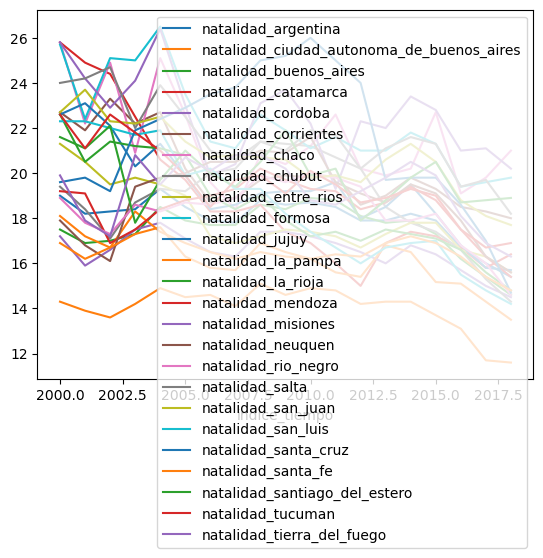

In [23]:
import matplotlib.pyplot as plt 

tasa_natalidad.plot()
plt.show()

In [33]:
import plotly.express as px 

fig = px.line(data_frame=tasa_natalidad)
fig.show()


## Ejercicios 15 (a)

En el archivo `data/imdb_top_1000.csv` está la lista de las 1000 'mejores' peliculas de acuerdo a lo que refiere dicha plataforma. 

- Lea el archivo con Pandas.
- Inspeccione el `DataFrame` con funciones de pandas (`head`, `columns` pueden ser métodos útiles).
- ¿Cuál es la película más antigua que figura en este ranking?
- Encuentre la 'mejor' película de acuerdo al índice `Meta_score`. (Busque la documentación del método `iloc` de la clase `DataFrame` de pandas)
- Encuentre la película más larga en la tabla (recuerde que el método `max` opera sobre números. Busque información sobre el método `str` de un `DataFrame`)
- Construya una función `del_director` que recibe un string con el nombre (posiblemente parcial) de un director y devuelve una lista de sus películas (`str` puede serle también aquí útil).